In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
churn.shape

(10000, 14)

In [6]:
churn.size

140000

In [7]:
churn.columns=churn.columns.str.strip()

In [8]:
churn.columns=churn.columns.str.lower()

In [9]:
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [10]:
churn.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [11]:
churn[churn.duplicated(subset=['customerid'],keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
churn.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='exited', ylabel='count'>

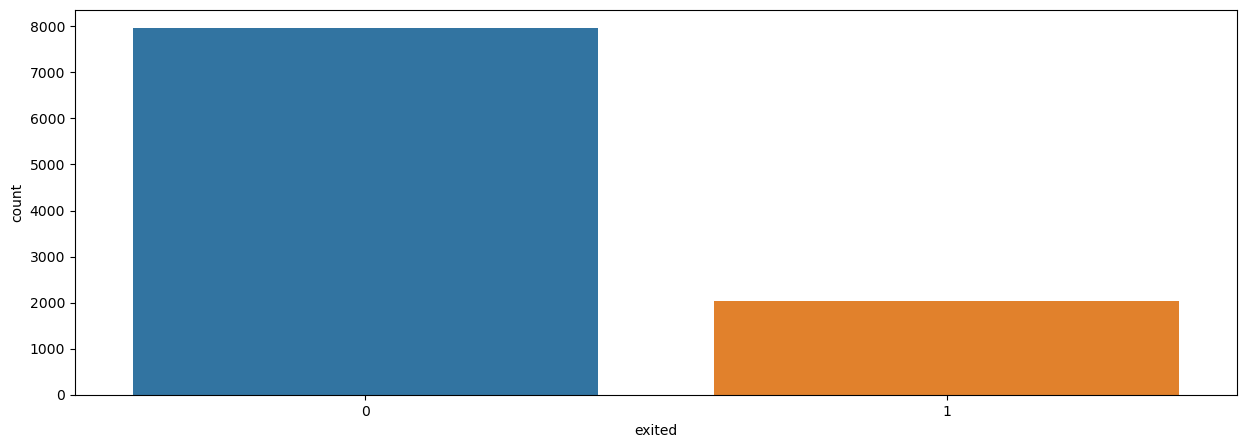

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn,x='exited')

In [15]:
from sklearn.utils import resample

In [16]:
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]

In [17]:
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)

In [18]:
churn_df=pd.concat([churn_majority_downsample,churn_minority])

In [19]:
churn_df['exited'].value_counts().to_frame()

,exited
0,2037
1,2037


In [20]:
churn_df.corr()

C:\Users\nandy\AppData\Local\Temp\ipykernel_11756\4129633855.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_df.corr()


,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.016870,0.015269,0.001694,0.004285,0.004927,0.006924,-0.000959,0.036572,-0.002736,-0.016111
customerid,0.016870,1.000000,0.006925,0.021270,-0.022085,-0.013445,0.021850,-0.014681,0.016976,0.010457,0.006177
creditscore,0.015269,0.006925,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
age,0.001694,0.021270,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.004285,-0.022085,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.004927,-0.013445,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.006924,0.021850,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,-0.000959,-0.014681,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.036572,0.016976,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.002736,0.010457,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173


C:\Users\nandy\AppData\Local\Temp\ipykernel_11756\19284043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_df.corr(),annot=True)


<Axes: >

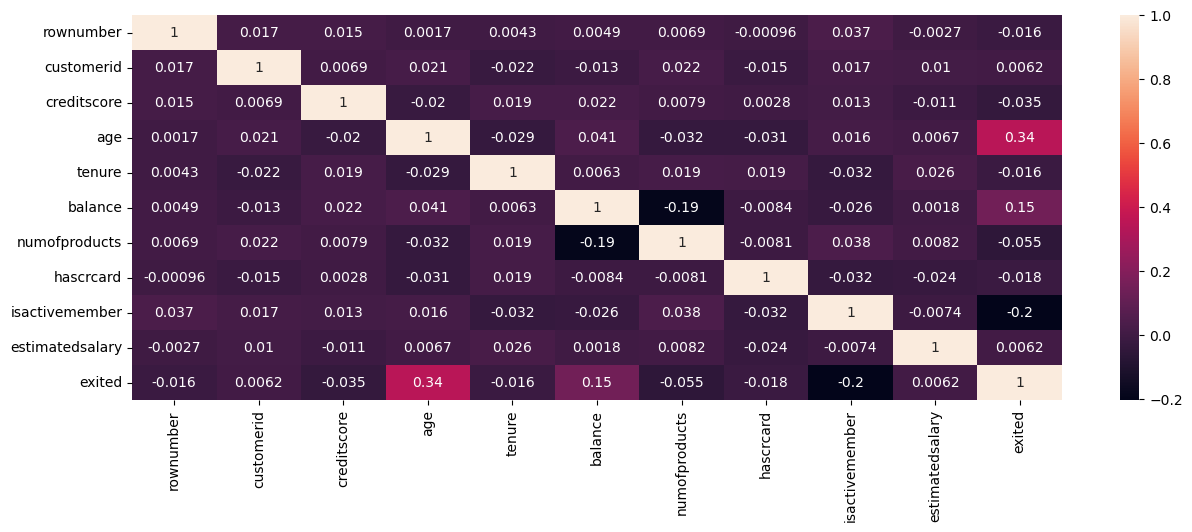

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(),annot=True)

In [22]:
df_corr_exit=churn_df.corr()['exited'].to_frame()

C:\Users\nandy\AppData\Local\Temp\ipykernel_11756\1109134018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_exit=churn_df.corr()['exited'].to_frame()


<Axes: ylabel='exited'>

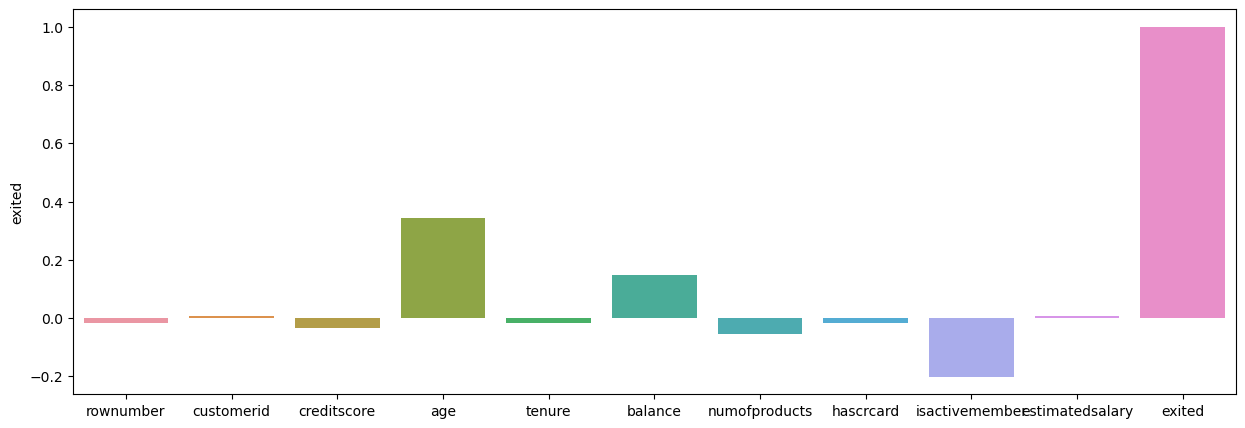

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='exited')

In [24]:
x=churn_df.drop(['exited'],axis=1)
y=churn_df['exited']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2851, 13), (1223, 13), (2851,), (1223,))